# Домашнее задание № 9

# Ансамблирование

In [11]:
# загрузим базовые библиотеки
import numpy as np
import pandas as pd

1. Получение данных

In [1]:
# подключаемся в Heart Failure Prediction Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
print("Path to dataset files:", path)

100%|██████████| 8.56k/8.56k [00:00<00:00, 4.35MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [20]:
# считываем данные
path = '/root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1/heart.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Атрибутивная информация
1. Age: возраст пациента [годы]
2. Sex: пол пациента [M: Мужчина, F: женщина]
3. ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: нестенокардитическая боль, ASY: бессимптомная]
4. RestingBP: кровяное давление в состоянии покоя [мм рт. ст.]
5. Cholesterol: сывороточный холестерин [мм / дл]
6. FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]
7. RestingECG: результаты электрокардиограммы в состоянии покоя [норма: норма, ST: наличие отклонений ST-T (инверсии зубца T и/или подъем или депрессия сегмента ST более 0,05 мВ), ГЛЖ: вероятная или явная гипертрофия левого желудочка по критериям Эстеса]
8. MaxHR: максимальная частота сердечных сокращений [числовое значение от 60 до 202]
9. ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: да, N: нет]
10. Oldpeak: oldpeak = ST [Числовое значение, измеряемое при депрессии]
11. ST_Slope: наклон пикового сегмента ST [Вверх: восходящий, Плоский: горизонтальный, Вниз: нисходящий]

Целевая переменная
* HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное состояние]

Посмотрим, что тут есть

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# проверим на пропуски
df[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


2. Подготовим датасет к обучению

Рассмотрим наши категориальные переменные более подробно

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
# ChestPainType
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [15]:
# RestingECG
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [17]:
# ExerciseAngina
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [18]:
# ST_Slope
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


Преобразуем их в числоые признаки

In [22]:
df = pd.get_dummies(data=df, columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                    prefix=['C', 'R', 'E', 'S'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,C_ASY,C_ATA,C_NAP,C_TA,R_LVH,R_Normal,R_ST,E_N,E_Y,S_Down,S_Flat,S_Up
0,40,M,140,289,0,172,0.0,0,False,True,False,False,False,True,False,True,False,False,False,True
1,49,F,160,180,0,156,1.0,1,False,False,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,0,98,0.0,0,False,True,False,False,False,False,True,True,False,False,False,True
3,48,F,138,214,0,108,1.5,1,True,False,False,False,False,True,False,False,True,False,True,False
4,54,M,150,195,0,122,0.0,0,False,False,True,False,False,True,False,True,False,False,False,True


In [23]:
# преобразуем Sex
gender_map = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(gender_map)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,C_ASY,C_ATA,C_NAP,C_TA,R_LVH,R_Normal,R_ST,E_N,E_Y,S_Down,S_Flat,S_Up
0,40,1,140,289,0,172,0.0,0,False,True,False,False,False,True,False,True,False,False,False,True
1,49,0,160,180,0,156,1.0,1,False,False,True,False,False,True,False,True,False,False,True,False
2,37,1,130,283,0,98,0.0,0,False,True,False,False,False,False,True,True,False,False,False,True
3,48,0,138,214,0,108,1.5,1,True,False,False,False,False,True,False,False,True,False,True,False
4,54,1,150,195,0,122,0.0,0,False,False,True,False,False,True,False,True,False,False,False,True


Вируализация

Тепловая карта

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

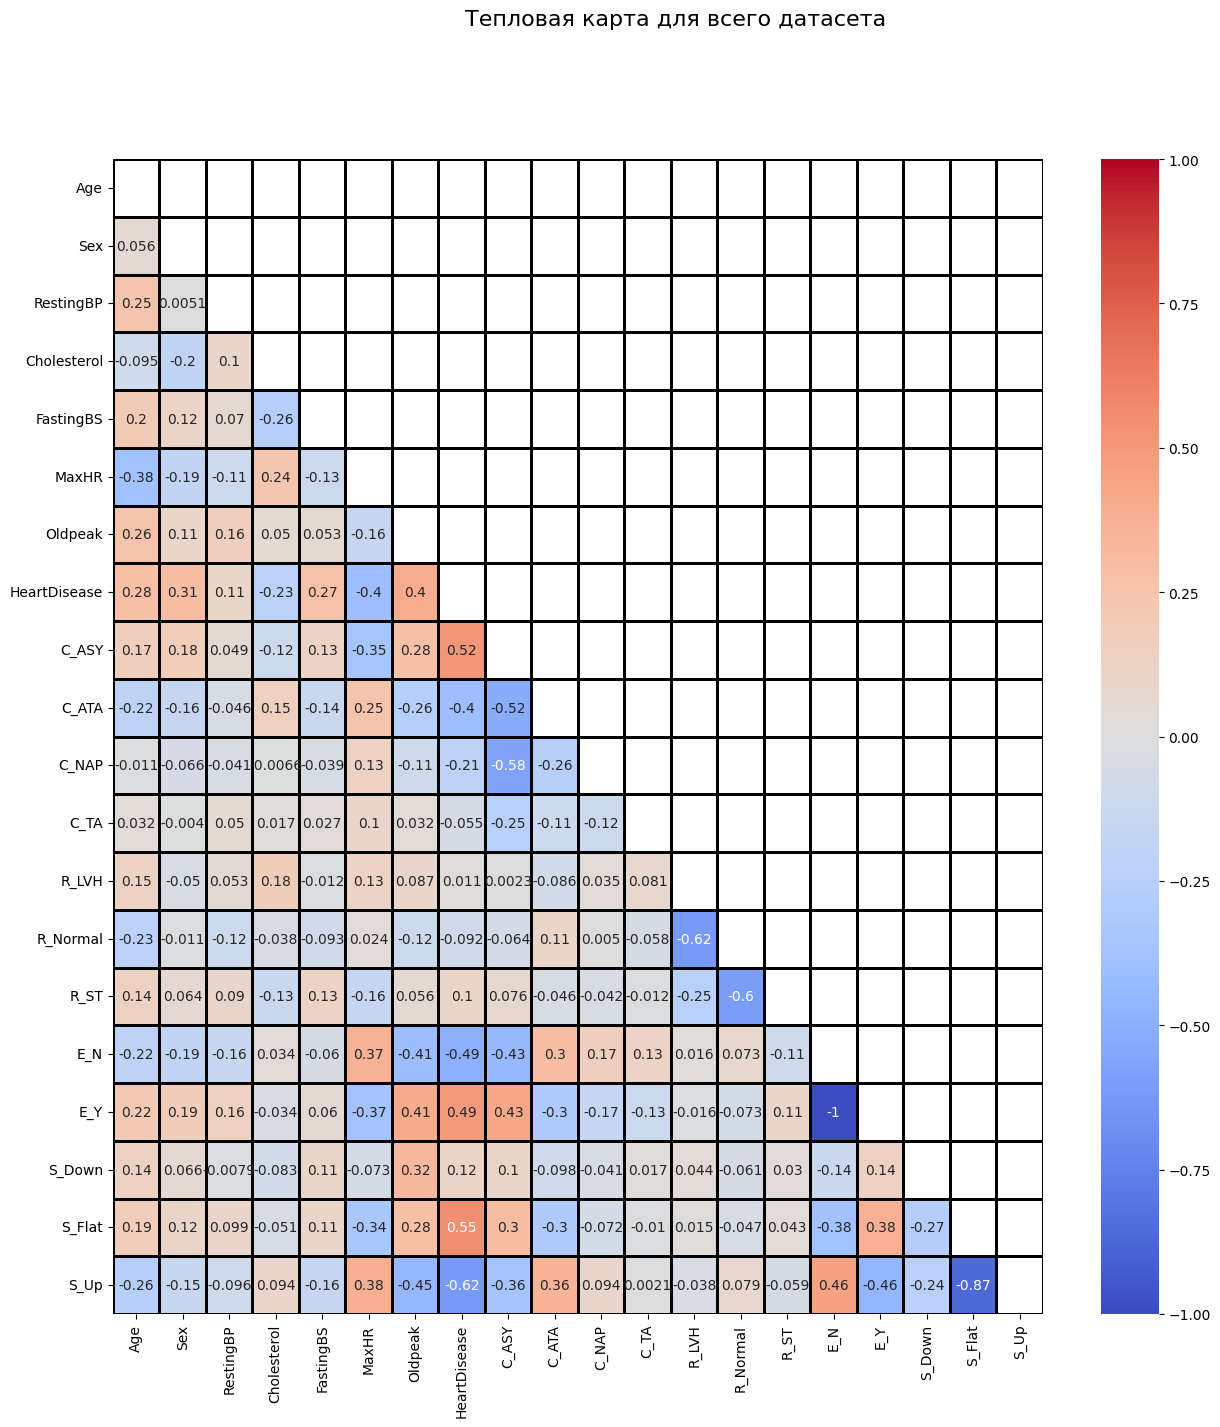

In [138]:
matrix = np.triu(df.corr())     # для построение карты треугольной форма
mask = np.tril(df.corr())       # другой вариант

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),          # построение корреляции
            annot=True,         # нахождение коэффициенто корреляции
            fmt='.2g',          # не более 2-х знаков после запятой
            vmin=-1,            # шкала (-1, 1) с центром в 0
            vmax=1,
            center=0,
            cmap='coolwarm',    # настройка цвета
            linewidths=1,       # толщина линий
            linecolor='black',  # цвет линий
            # cbar_kws={'orientation': 'horizontal'}   # для горизонтального расположения
            # cbar=False        # можно убрать шкалу
            # square=True       # сделать ячейки квадратными
            mask=matrix         # треуголиник основанием вниз
            # mask=mask         # треугольник основание вверх
            )
                                # .set_title('Тепловая карта для всего датасета')
                                # можно так

plt.suptitle('Тепловая карта для всего датасета', fontsize=16)
plt.show()

Попарная корреляция

<Figure size 1500x1500 with 0 Axes>

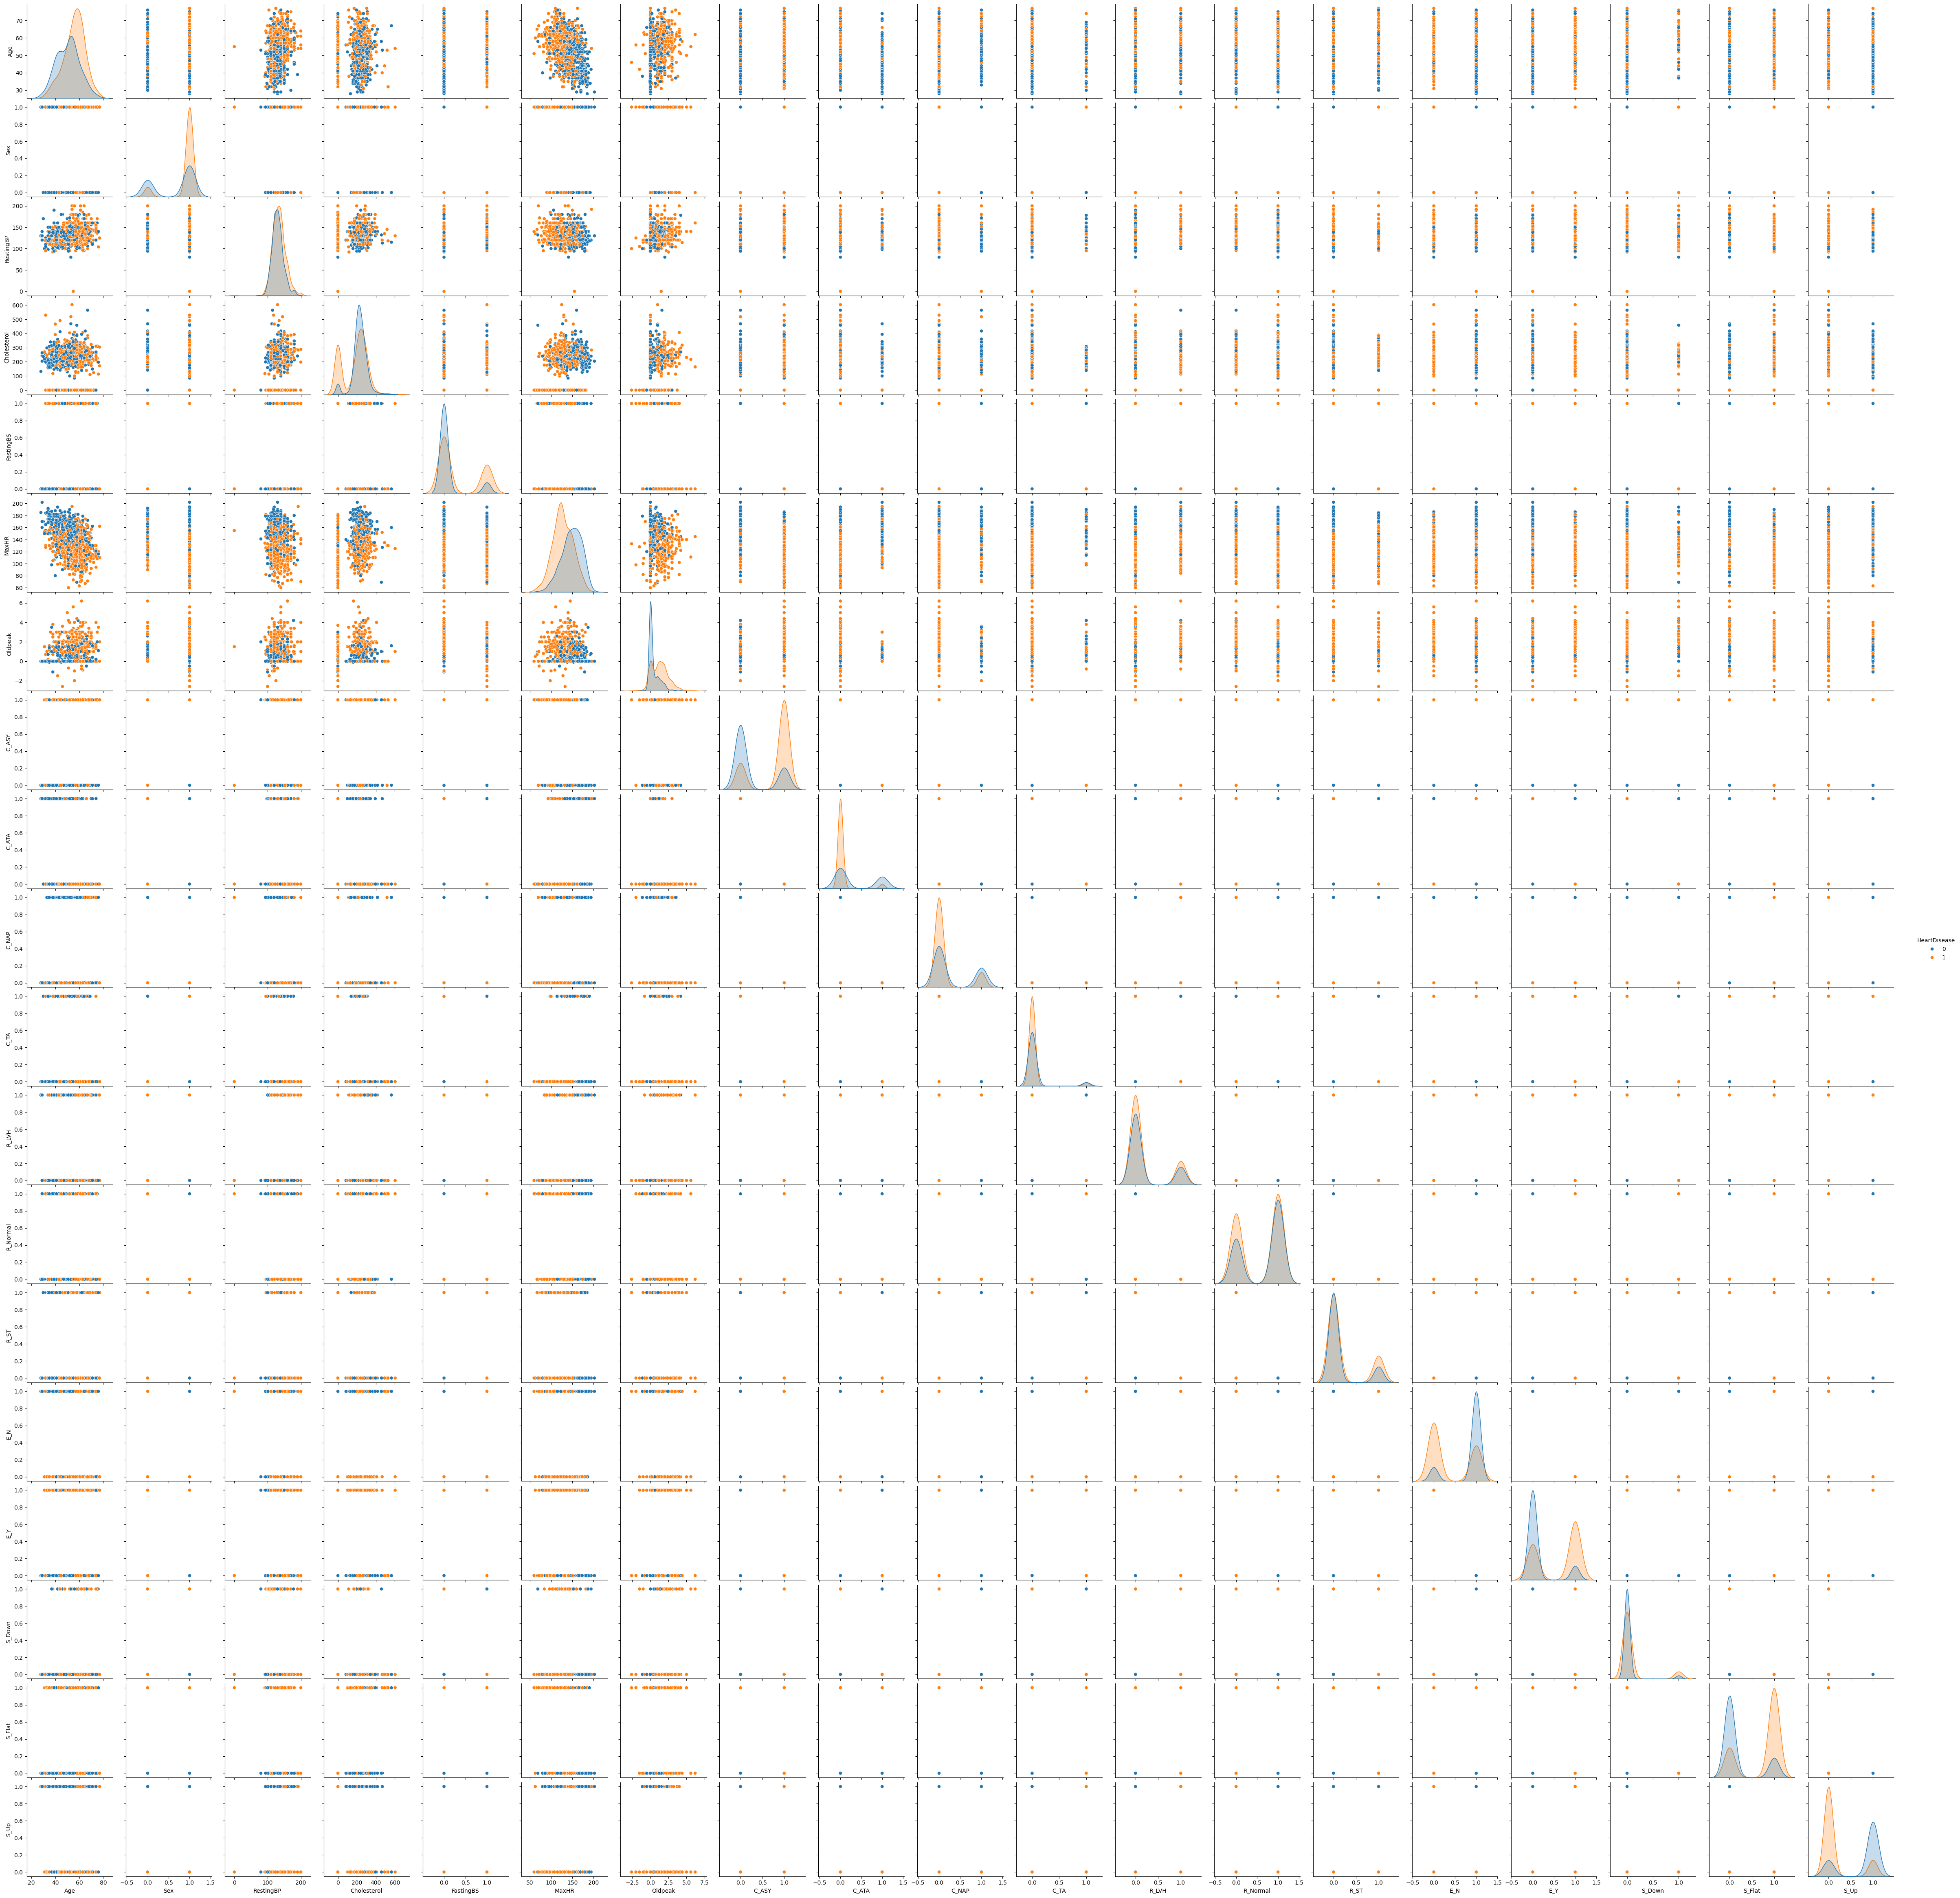

In [141]:
# для всего датасета
plt.figure(figsize=(15, 15))
sns.pairplot(df, hue ='HeartDisease')
plt.show()

Корелляцию выбранных параметры можно посмотреть, например, так

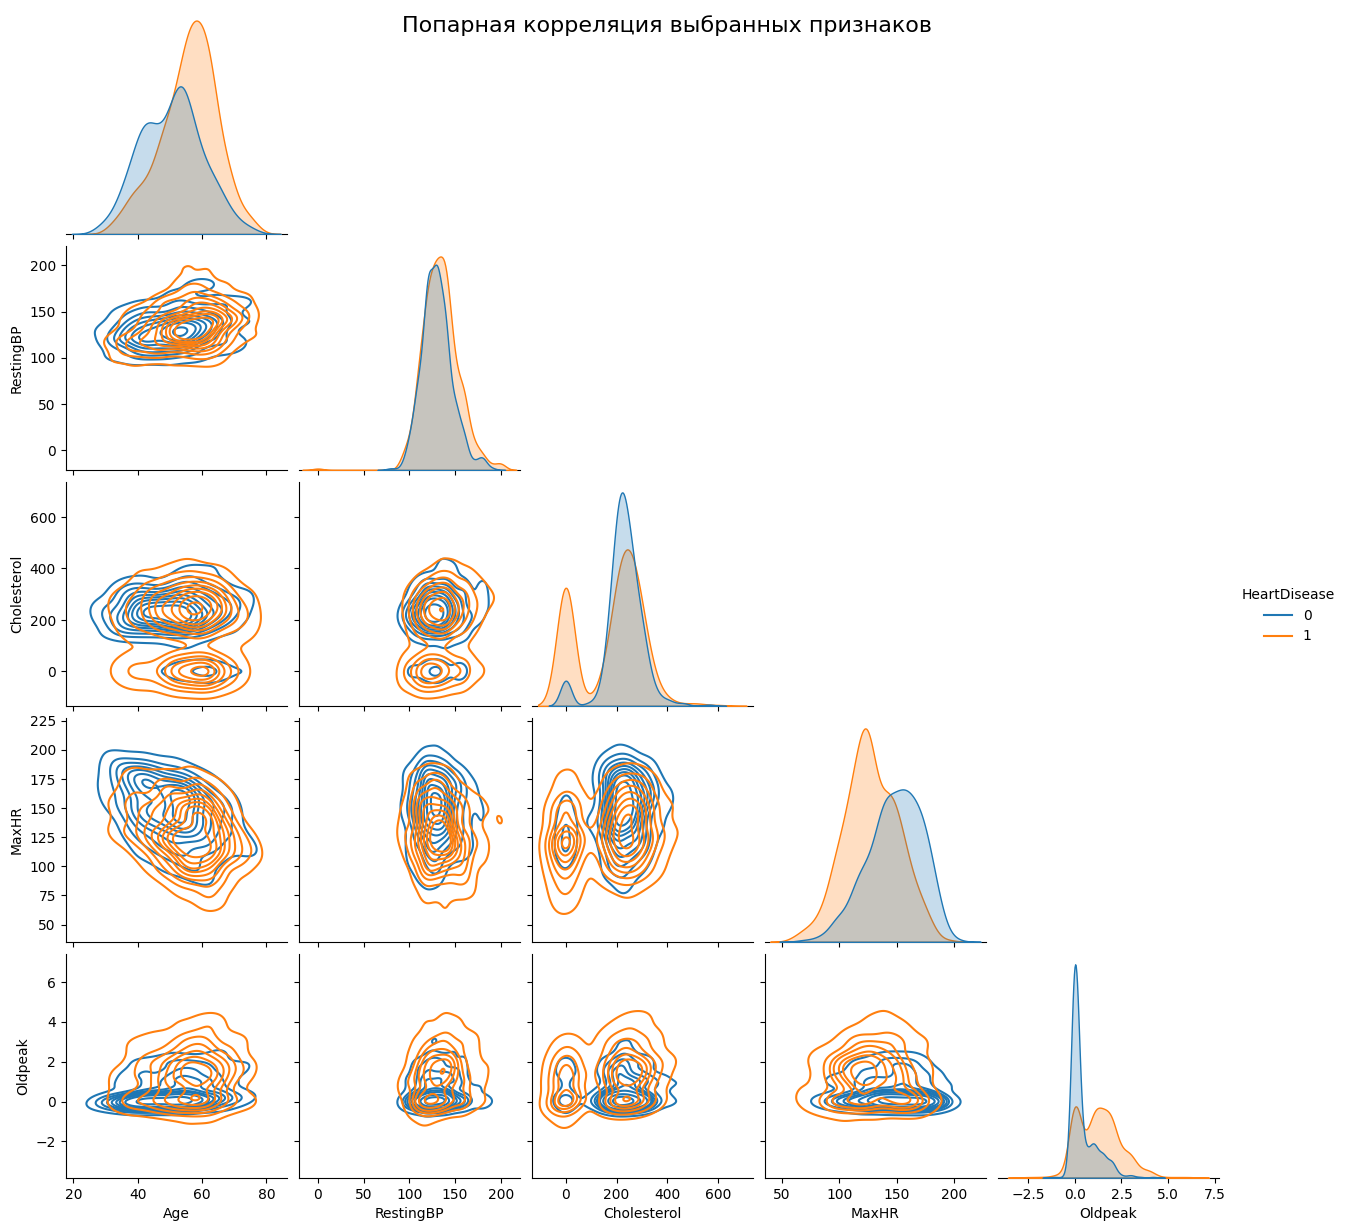

In [135]:
# для выбранных столбцов
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
sns.pairplot(df[columns],
             hue ='HeartDisease',
             kind='kde',
             corner=True
             )
plt.suptitle('Попарная корреляция выбранных признаков', fontsize=16)
plt.show()

3. Разобъем датасет на обучающую и тестовую выборку

In [24]:
# напишем небольшую функцию
from sklearn.model_selection import train_test_split

def get_train_test_data (data, target_col='HeartDisease', test_size=0.2, random_seed=42):

    # сформируем X, y  из общего df
    tmp_columns = list(data.columns.values[~np.isin(data.columns.values, target_col)])
    X = data[tmp_columns]
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=random_seed)

    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = get_train_test_data(df)

4. Обучим дерево решений на обучающем множестве

а) модель DecisionTreeClassifier

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [27]:
# создадим молель
model_DTC = DecisionTreeClassifier(criterion='gini',
            # Функция для измерения качества разделения.
            # Поддерживаемые значения: 'gini', 'entropy', 'log_loss.
            # По умолчанию — 'gini
                                   splitter='best',
            # Стратегия выбора разделения в каждом узле.
            # Поддерживаемые значения: 'best' и 'random'.
            # По умолчанию — 'best'
                                   max_depth=10,      # Максимальная глубина дерева
                                   min_samples_leaf=10,
            # Минимальное количество примеров, которое должно быть в листовом узле
            # (по умолчанию — 1)
                                   random_state=42    # Управляет случайностью оценки
                                  )

In [28]:
# обучим модель
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [29]:
# получим предсказания
y_pred = model_DTC.predict(X_test)

In [30]:
# вычислим точность модели
model_DTC.score(X_test, y_test)

0.8695652173913043

In [32]:
# получим отчет о классификации
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



б) модель RandomForestClassifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [178]:
# создадим молель
model_RFC = RandomForestClassifier(n_estimators=100,
            # Количество деревьев в лесу. Чем больше деревьев, тем лучше качество,
            # но время настройки и работы алгоритма также пропорционально увеличиваются
                                   max_depth=10,
            # Максимальная глубина каждого дерева.
            # Более глубокие деревья могут улавливать более сложные закономерности,
            # но также есть риск переобучения
                                   max_features='sqrt',
            # Количество признаков, рассматриваемых для расщепления на каждом узле.
            # Общее значение — 'sqrt' (квадратный корень из общего количества признаков)
                                   criterion='entropy',
            # Функция, используемая для измерения качества расщепления
            # 'gini' или 'entropy'
                                   random_state=42    # Управляет случайностью оценки
                                  )


In [179]:
# обучим модель
model_RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [180]:
# получим предсказания
y_pred = model_RFC.predict(X_test)

In [181]:
# вычислим точность модели
model_RFC.score(X_test, y_test)

0.8913043478260869

In [182]:
# получим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



6. Выведем важность признаков для RandomForestClassifier

Важность признаков определяется с помощью подобранного атрибута feature_importances_ и рассчитывается как среднее значение и стандартное отклонение накопления уменьшения количества примесей в каждом дереве

In [207]:
importances = model_RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_RFC.estimators_], axis=0)
std

array([0.02970779, 0.01912316, 0.02033659, 0.03404014, 0.01026664,
       0.04254004, 0.04224995, 0.06339124, 0.03396321, 0.01260519,
       0.00671435, 0.00909762, 0.00862175, 0.00651709, 0.07977226,
       0.0757971 , 0.01536923, 0.09693374, 0.12151314])

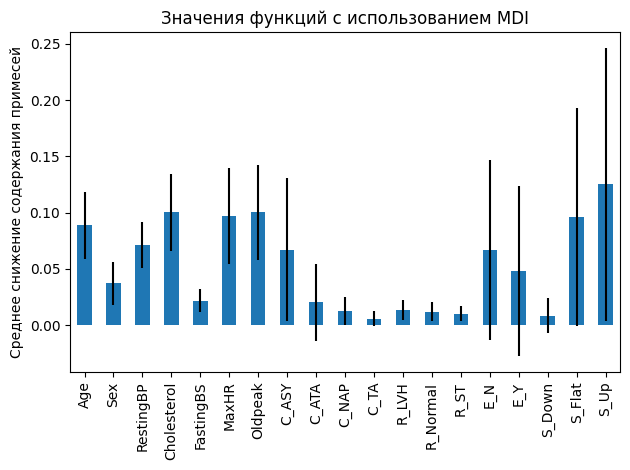

In [209]:
# построим график важности, основанной на примесях
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Значения функций с использованием MDI')
ax.set_ylabel('Среднее снижение содержания примесей')
fig.tight_layout()

Важность признаков, основанная на перестановках, преодолевает ограничения, связанные с важностью признаков, основанной на отклонениях: она не смещена в сторону признаков с большим количеством значений и может быть рассчитана на основе тестового набора данных.

In [211]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_RFC, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
                               )
forest_importances = pd.Series(result.importances_mean, index=feature_names)

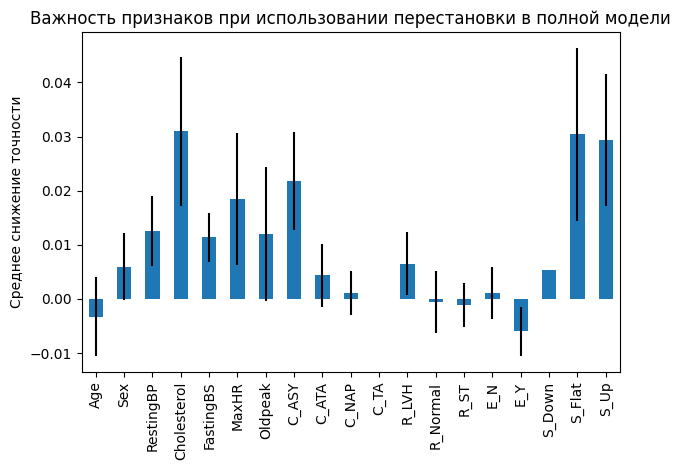

In [212]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Важность признаков при использовании перестановки в полной модели")
ax.set_ylabel("Среднее снижение точности")
fig.tight_layout()
plt.show()

7. BaggingClassifier

а) модель DecisionTreeClassifier

In [49]:
# Используем DecisionTreeClassifier() в качестве базового оценщика
base_est = DecisionTreeClassifier()

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [34]:
# посмотрим на размер нашего df
df.shape

(918, 20)

In [70]:
# генерируем случайный набор данных для классификации с указанными характеристиками
X, y = make_classification(n_samples=100,     # Количество точек данных
                           n_features=15,
       # Число признаков разных типов, количество каждого из которых задаётся параметрами
       # n_informative (информативные)
       # n_redundant (производные (линейные комбинации информативных)
       # n_repeated (повторяющиеся)
                           n_informative=10,
                           n_redundant=2,
                           n_repeated=1,
                           random_state=42,
                           shuffle=True
       # Опция перемешивания, при этом перемешиваются не только точек, но и порядка признаков
                          )

In [71]:
# разделяем датасет на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# используем дерево решений в качестве базового оценщика
base_est = DecisionTreeClassifier()

In [73]:
# построим модель
model_BC = BaggingClassifier(estimator=base_est,
                                   n_estimators=10,
                                   random_state=42)

In [74]:
# обучим модель
model_BC.fit(X, y)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [75]:
# получим предсказания
y_pred = model_BC.predict(X_test)

In [76]:
# вычислим точность модели
model_BC.score(X_test, y_test)

0.95

In [77]:
# получим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



8. Стекинг трех моделей

Сначала построим LinearSVC()

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)